In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
def create_matrix(n):
  return [[(np.random.randint(2)-(1/2))*2 for i in range(n)] for j in range(n)]

In [ ]:
def Monte_Carlo(T,state):
  for i in range(len(state)):
    for j in range(len(state[i])):
      s = state[i][j]
      nb = state[(i+1)%len(state)][j] + state[(i-1)%len(state)][j] + state[i][(j+1)%len(state)] + state[i][(j-1)%len(state)]
      E =  2 * 2 * s * nb
      if E < 0 or np.random.rand() < np.exp(-E/T):
        state[i][j] = -s

  #plt.matshow(state)
  return abs(sum(sum(state,[]))),state

In [ ]:
def fit(x, k, w, x0, y0):
    return k * np.arctan(w*(x-x0)) + y0

Crit. Temp = 4.721


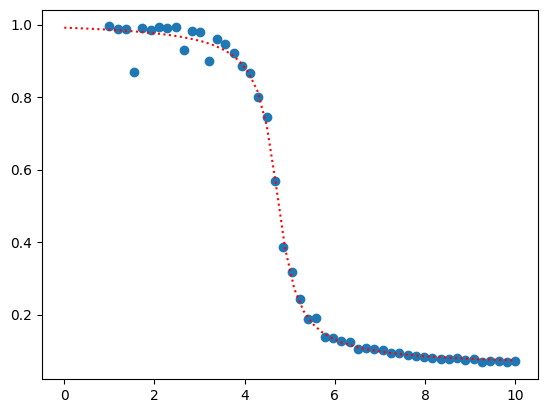

In [ ]:
Temps = np.linspace(1,10.0, 50)
avg_s = []
for T in Temps:
  s= []
  state = create_matrix(20)
  for k in range(500):
    M, state = Monte_Carlo(T,state)
    s.append(M/400)
  avg_s.append(np.average(s))


mval = []
Tval = []
for t, m in zip(Temps, avg_s):

    if t < 3 and m < 0.6:
        continue

    Tval.append(t)
    mval.append(m)
p0 = [1, 1]
p0.append(0.5*(max(Tval) + min(Tval)))
p0.append(0.5*(max(mval) + min(mval)))
out = curve_fit(fit, Tval , mval, p0=p0, full_output=True)
copt = out[0]

print('Crit. Temp = {:1.3f}'.format(copt[2]))
plt.plot(Temps,avg_s, 'o')
xfit = temps = np.linspace(0, 10, 50)
yfit = fit(xfit, *copt)

plt.plot(xfit, yfit, 'r:')
plt.show()



From running the plot multiple times and fitting the curve, I was able to figure out that the point with the highest d/dT value was at approximately 4.67.

---



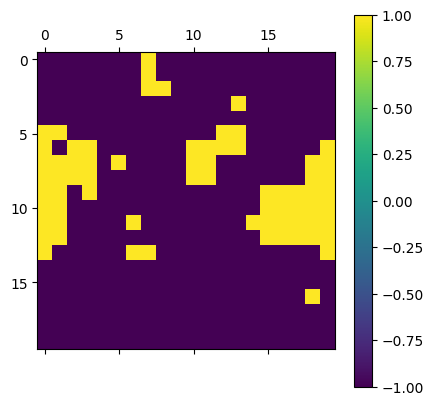

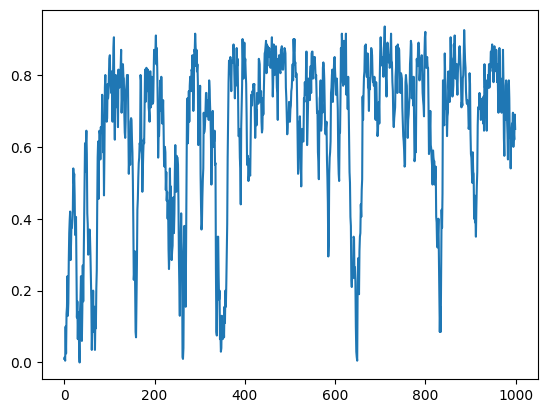

In [ ]:

state = create_matrix(20)
M = []
for i in range(1000):
  a, state = Monte_Carlo(4.6, state)
  M.append(a/400)
plt.matshow(state)
plt.colorbar()
plt.show()
plt.plot(M)

n = 20, B = 0.198


<ipython-input-7-6a7ca0cc198c>:15: RuntimeWarning: divide by zero encountered in log
  logT = np.log(4.67 - Temps)


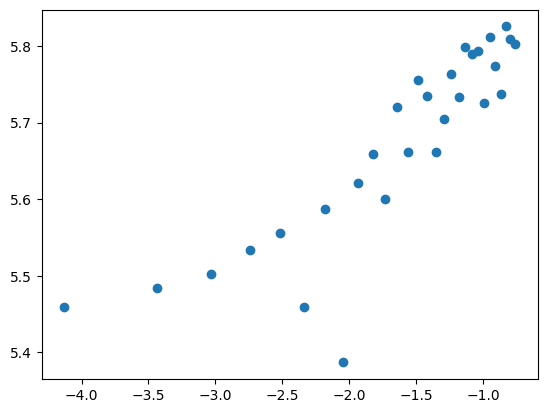

In [ ]:
a = 4.67 * .9
Temps = np.linspace(a, 4.67, 30)
avg_s = []
for T in Temps:
  s= []
  state = create_matrix(20)
  for k in range(500):
    M, state = Monte_Carlo(T,state)
    s.append(M)
  avg_s.append(np.average(s))

var_list = []

logM = np.log(avg_s)
logT = np.log(4.67 - Temps)

plt.plot(logT,logM, 'o')
valid = np.where((logM > np.log(.1)) & (logT > np.log(0.1)))
p0 = [1, 1]
popt, _ = curve_fit(lambda x, c, b: c + b*x, logT[valid], logM[valid], p0=p0)
var = popt[1]
var_list.append(var)

print(f'n = 20, B = {var:.3f}')
plt.show()


From an eyeball fit, we can see that the graph above is close to that of 1/8 exponent. When fit on excel we see that the exponent is about .157 which is very close to the expected value of 1/8. This disrepency could have been caused by the inconsistencies of the Magnetic values closer to the critical point.

n = 40, B = 0.246


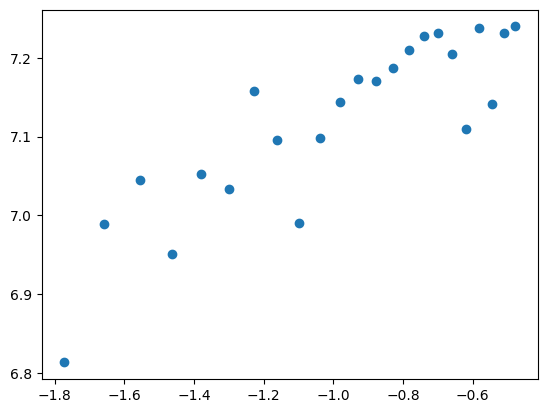

In [ ]:
Temps = np.linspace(4.5*.9, 4.5, 23)
avg_s = []
for T in Temps:
  s= []
  state = create_matrix(40)
  for k in range(1000):
    M, state = Monte_Carlo(T,state)
    s.append(M)
  avg_s.append(np.average(s))

var_list = []

logM = np.log(avg_s)
logT = np.log(4.67 - Temps)

plt.plot(logT,logM, 'o')
valid = np.where((logM > np.log(.1)) & (logT > np.log(0.1)))
p0 = [1, 1]
popt, _ = curve_fit(lambda x, c, b: c + b*x, logT[valid], logM[valid], p0=p0)
var = popt[1]
var_list.append(var)

print(f'n = 40, B = {var:.3f}')
plt.show()


In [ ]:
1.69/1.56

1.0833333333333333

This ratio is almost 2^1/2

In [ ]:
def energy(spins, J):
    """
    Calculate the energy of the spin configuration.
    """
    E = 0
    for i in range(len(spins)):
        for j in range(len(spins)):
            s = spins[i][j]
            nb = spins[(i+1)%len(spins)][j] + spins[(i-1)%len(spins)][j] + \
                 spins[i][(j+1)%len(spins)] + spins[i][(j-1)%len(spins)]
            E += -J * s * nb *.5
    return E

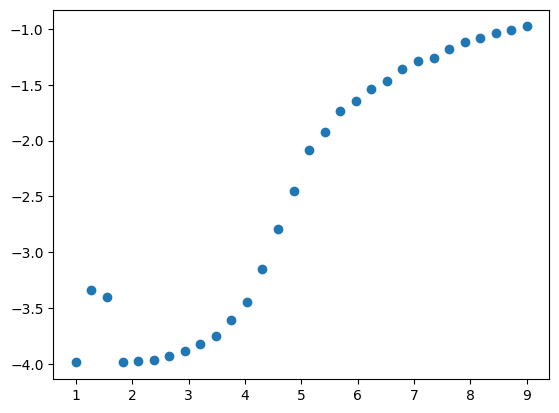

In [ ]:
Temps = np.linspace(1,9.0, 30)
avg_s = []
avg_e = []
for T in Temps:
  s= []
  e = []
  state = create_matrix(20)
  for k in range(500):
    M, state = Monte_Carlo(T,state)
    s.append(M/400)
    e.append(energy(state, 2))
  avg_s.append(np.average(s))
  avg_e.append(np.average(e)/400)

plt.plot(Temps,avg_e,  'o')
plt.show()

The energy graph past the critical value seems to be trending towards 0 but its rate of doing so was slowing down significantly after an energy/spin of -2.

In [ ]:
def delta_energy(spins, J):
    """
    Calculate the energy of the spin configuration.
    """
    E = 0
    for i in range(len(spins)):
        for j in range(len(spins)):
            s = spins[i][j]
            nb = spins[(i+1)%len(spins)][j] + spins[(i-1)%len(spins)][j] + spins[i][(j+1)%len(spins)] + spins[i][(j-1)%len(spins)]
            E += -J * s * nb *.5
    return E , E**2

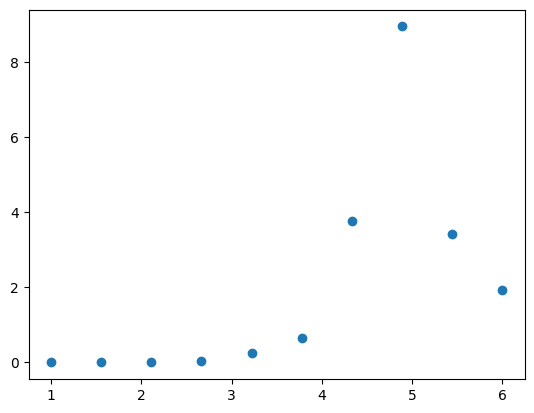

[8.936323618239753]


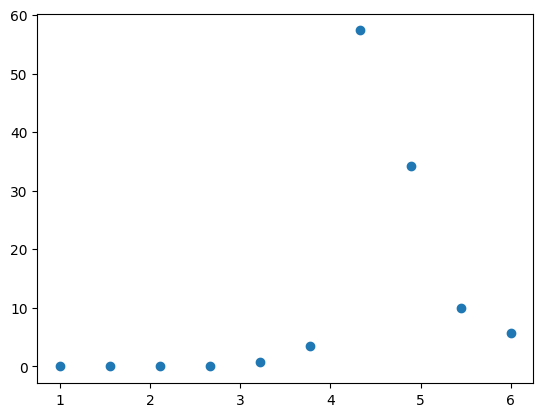

[8.936323618239753, 57.35402179585607]


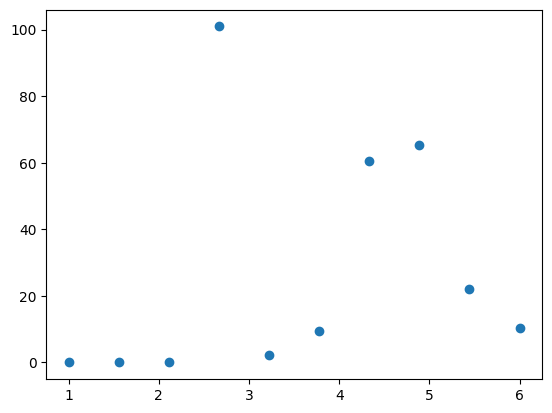

[8.936323618239753, 57.35402179585607, 100.95955118701104]


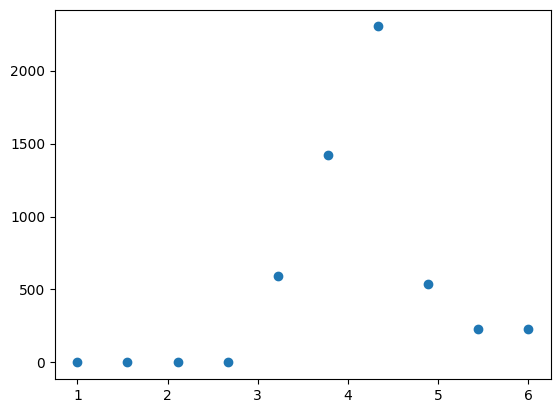

[8.936323618239753, 57.35402179585607, 100.95955118701104, 2301.888396371617]


In [ ]:
size = [10,20,30,100]
Cmax = []
for i in size:
  Temps = np.linspace(1,6.0, 10)
  avg_s = []
  avg_e = []
  for T in Temps:
    s= []
    e1 = []
    state = create_matrix(i)
    for k in range(500):

      M, state = Monte_Carlo(T,state)
      if k > 100:
        e1.append(energy(state, 2))
    avg_e.append((np.var(e1)**2)/(T**2)/(400*i**2))

  plt.plot(Temps,avg_e,  'o')
  plt.show()

  Cmax.append(max(avg_e))
  print(Cmax)


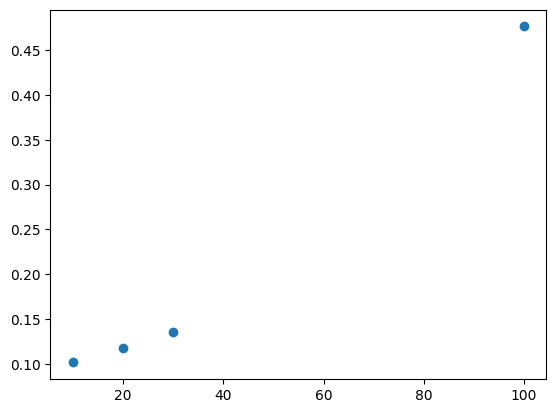

In [ ]:
CN=[]
for i in range(len(Cmax)):
  CN.append(Cmax[i]/(size[i]**2))

plt.plot(size, CN,'o')

This matches up with the expectation with log(n) graph. The extraneous data point does make things a bit more difficult but the fit is clear to see when excluded.  

In [ ]:
def Monte_Carlo_magnetization(T,H,state):
  for i in range(len(state)):
    for j in range(len(state[i])):
      s = state[i][j]
      nb = state[(i+1)%len(state)][j] + state[(i-1)%len(state)][j] + state[i][(j+1)%len(state)] + state[i][(j-1)%len(state)]
      E = 2 * 2 * s * nb - 2 * H * s
      if E < 0 or np.random.rand() < np.exp(-E/T):
        state[i][j] = -s

  #plt.matshow(state)
  return (sum(sum(state,[]))),state

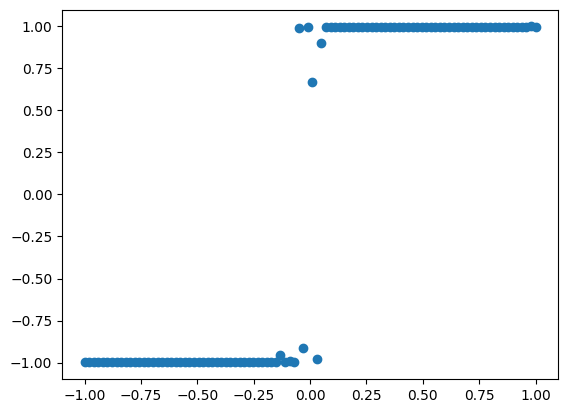

In [ ]:
H = np.linspace(-1, 1, 100)
avg_s = []
T = 4.6/3
for h in H:
  s= []
  state = create_matrix(20)
  for k in range(500):
    M, state = Monte_Carlo_magnetization(T,h,state)
    s.append(-M/400)
  avg_s.append(np.average(s))

plt.plot(H, avg_s,'o')

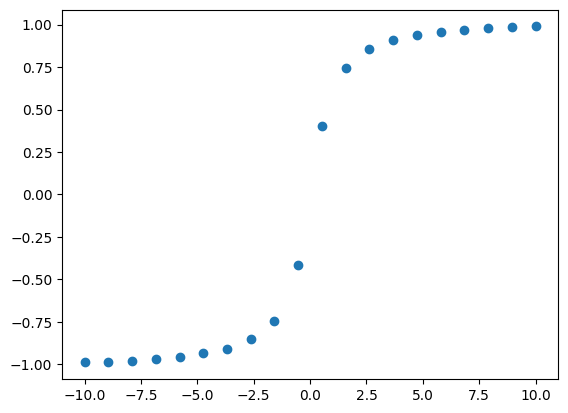

In [ ]:
H = np.linspace(-10, 10, 20)
avg_s = []
T = 4.6*1.5
for h in H:
  s= []
  state = create_matrix(20)
  for k in range(500):
    M, state = Monte_Carlo_magnetization(T,h,state)
    s.append(-M/400)
  avg_s.append(np.average(s))

plt.plot(H, avg_s,'o')

For graph 2, we can see the slope changing at a relatively slow pace, but this doesnt seem to hold true with graph 1. When focusing on smaller numbers it seems to jump between, but we can see that the graph seems to be continuous by noticing the edges that are closer to 0. We can see how much slower the graph switches in the second graph. This is probably due to the effect of hysteresis where it clearly lags behind the changing magnetic field at a higher temperature.